# MIA attacks on Length-of-Stay predictor, Gated Recurrent Unit with Decay (GRU-D)
## Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
import sys

from torch import zeros

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from utils.data_processing import get_mimic_dataloaders, get_mimic_dataset

The  `batch_size` is one of the parameters which is assigned based on hyperparameter tuning as detailed in [this notebook](https://github.com/MLforHealth/MIMIC_Extract/blob/4daf3c89be7de05d26f47819d68d5532de6f753a/notebooks/Baselines%20for%20Mortality%20and%20LOS%20prediction%20-%20GRU-D.ipynb).

In [4]:
# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

train_frac = 0.4
valid_frac = 0.0
test_frac = 0.0
early_stop_frac = 0.4
batch_size = 59
use_LR = False # True if you want to use the LR model, False if you want to use the GRUD model

dataset, train_indices, validation_indices, test_indices, early_stop_indices= get_mimic_dataset(path,
                                                                            train_frac ,
                                                                            valid_frac,
                                                                            test_frac,
                                                                            early_stop_frac,
                                                                            use_LR)

Loading dataset...
Loaded dataset from /home/fazeleh/LeakPro/examples/mia/LOS/data/unflattened/dataset.pkl


In [5]:
train_loader, validation_loader, test_loader, early_stop_loader = get_mimic_dataloaders(dataset,
                                                            train_indices,
                                                            validation_indices,
                                                            test_indices,
                                                            early_stop_indices,
                                                            batch_size)

The `optimized_hyperparams` is assigned based on hyperparameter tuning as detailed in [this notebook](https://github.com/MLforHealth/MIMIC_Extract/blob/4daf3c89be7de05d26f47819d68d5532de6f753a/notebooks/Baselines%20for%20Mortality%20and%20LOS%20prediction%20-%20GRU-D.ipynb).

In [6]:
optimized_hyperparams ={
    "cell_size": 58,
    "hidden_size": 78,
    "learning_rate": 0.0004738759319792616,
    "num_epochs":37,
    "patience_early_stopping": 20,
    "patience_lr_scheduler": 5,
    "batch_size": 59,
    "seed": 4410,
    "min_delta": 0.00001,
    }
n_features = int(dataset.x.shape[1]/3)
X_mean = zeros(1,dataset.x.shape[2],n_features)

model_params = {k: optimized_hyperparams[k] for k in ["cell_size", "hidden_size", "batch_size"]}

# Add other required parameters to model_params
model_params.update({
    "input_size": n_features,
    "X_mean": X_mean,
    "output_last": False
})

In [7]:
from utils.model_grud import *

# Initialize the model with filtered parameters
model = GRUD(**model_params)

# Train the model with Train_Model function
train_losses, test_losses , train_acc, test_acc = gru_trained_model_and_metadata(model,
                                                                                train_loader,
                                                                                early_stop_loader,
                                                                                epochs = optimized_hyperparams["num_epochs"],
                                                                                patience_early_stopping = optimized_hyperparams["patience_early_stopping"],
                                                                                patience_lr= optimized_hyperparams["patience_lr_scheduler"],
                                                                                min_delta = optimized_hyperparams["min_delta"],
                                                                                learning_rate = optimized_hyperparams["learning_rate"])

Model Structure:  GRUD(
  (zl): Linear(in_features=286, out_features=78, bias=True)
  (rl): Linear(in_features=286, out_features=78, bias=True)
  (hl): Linear(in_features=286, out_features=78, bias=True)
  (gamma_x_l): FilterLinear(in_features=104, out_features=104, bias=True)
  (gamma_h_l): Linear(in_features=104, out_features=78, bias=True)
  (fc): Linear(in_features=78, out_features=2, bias=True)
  (bn): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.7, inplace=False)
)
Start Training ... 
Output type dermined by the model


Training Progress:   3%|▎         | 1/37 [00:07<04:24,  7.34s/it]

Epoch 0: Validation loss improved to 0.5127
Learning Rate: 0.000474
Epoch: 0, train_loss: 0.90600625, valid_loss: 0.51268703, time: 7.34


Training Progress:   5%|▌         | 2/37 [00:14<04:05,  7.01s/it]

Epoch 1: Validation loss improved to 0.5078
Learning Rate: 0.000474
Epoch: 1, train_loss: 0.80034931, valid_loss: 0.50783253, time: 6.78


Training Progress:   8%|▊         | 3/37 [00:20<03:55,  6.93s/it]

Epoch 2: No improvement. Patience counter: 1/20
Learning Rate: 0.000474
Epoch: 2, train_loss: 0.76733459, valid_loss: 0.55360639, time: 6.83


Training Progress:  11%|█         | 4/37 [00:27<03:46,  6.87s/it]

Epoch 3: No improvement. Patience counter: 2/20
Learning Rate: 0.000474
Epoch: 3, train_loss: 0.74066611, valid_loss: 0.53837186, time: 6.77


Training Progress:  14%|█▎        | 5/37 [00:34<03:39,  6.86s/it]

Epoch 4: No improvement. Patience counter: 3/20
Learning Rate: 0.000474
Epoch: 4, train_loss: 0.72348623, valid_loss: 0.52800447, time: 6.85


Training Progress:  16%|█▌        | 6/37 [00:41<03:32,  6.86s/it]

Epoch 5: No improvement. Patience counter: 4/20
Learning Rate: 0.000474
Epoch: 5, train_loss: 0.70422922, valid_loss: 0.5873853, time: 6.84


Training Progress:  19%|█▉        | 7/37 [00:48<03:25,  6.86s/it]

Epoch 6: No improvement. Patience counter: 5/20
Learning Rate: 0.000474
Epoch: 6, train_loss: 0.68721295, valid_loss: 0.54968578, time: 6.88


Training Progress:  22%|██▏       | 8/37 [00:55<03:18,  6.85s/it]

Epoch 7: No improvement. Patience counter: 6/20
Epoch 00008: reducing learning rate of group 0 to 2.3694e-04.
Learning Rate: 0.000237
Epoch: 7, train_loss: 0.65936494, valid_loss: 0.56551975, time: 6.82


Training Progress:  24%|██▍       | 9/37 [01:02<03:12,  6.86s/it]

Epoch 8: No improvement. Patience counter: 7/20
Learning Rate: 0.000237
Epoch: 8, train_loss: 0.61763578, valid_loss: 0.57842529, time: 6.88


Training Progress:  27%|██▋       | 10/37 [01:08<03:05,  6.86s/it]

Epoch 9: No improvement. Patience counter: 8/20
Learning Rate: 0.000237
Epoch: 9, train_loss: 0.62895368, valid_loss: 0.56870216, time: 6.85


Training Progress:  30%|██▉       | 11/37 [01:15<02:58,  6.86s/it]

Epoch 10: No improvement. Patience counter: 9/20
Learning Rate: 0.000237
Epoch: 10, train_loss: 0.6022617, valid_loss: 0.5680961, time: 6.87


Training Progress:  32%|███▏      | 12/37 [01:22<02:51,  6.88s/it]

Epoch 11: No improvement. Patience counter: 10/20
Learning Rate: 0.000237
Epoch: 11, train_loss: 0.59018976, valid_loss: 0.55305964, time: 6.92


Training Progress:  35%|███▌      | 13/37 [01:29<02:45,  6.88s/it]

Epoch 12: No improvement. Patience counter: 11/20
Learning Rate: 0.000237
Epoch: 12, train_loss: 0.58661764, valid_loss: 0.57494694, time: 6.88


Training Progress:  38%|███▊      | 14/37 [01:36<02:38,  6.87s/it]

Epoch 13: No improvement. Patience counter: 12/20
Epoch 00014: reducing learning rate of group 0 to 1.1847e-04.
Learning Rate: 0.000118
Epoch: 13, train_loss: 0.58373045, valid_loss: 0.56426746, time: 6.87


Training Progress:  41%|████      | 15/37 [01:43<02:31,  6.89s/it]

Epoch 14: No improvement. Patience counter: 13/20
Learning Rate: 0.000118
Epoch: 14, train_loss: 0.5602767, valid_loss: 0.56786698, time: 6.91


Training Progress:  43%|████▎     | 16/37 [01:50<02:24,  6.89s/it]

Epoch 15: No improvement. Patience counter: 14/20
Learning Rate: 0.000118
Epoch: 15, train_loss: 0.55402973, valid_loss: 0.56124943, time: 6.9


Training Progress:  46%|████▌     | 17/37 [01:57<02:17,  6.90s/it]

Epoch 16: No improvement. Patience counter: 15/20
Learning Rate: 0.000118
Epoch: 16, train_loss: 0.55244331, valid_loss: 0.5543347, time: 6.91


Training Progress:  49%|████▊     | 18/37 [02:04<02:11,  6.91s/it]

Epoch 17: No improvement. Patience counter: 16/20
Learning Rate: 0.000118
Epoch: 17, train_loss: 0.54556851, valid_loss: 0.56179345, time: 6.93


Training Progress:  51%|█████▏    | 19/37 [02:10<02:04,  6.90s/it]

Epoch 18: No improvement. Patience counter: 17/20
Learning Rate: 0.000118
Epoch: 18, train_loss: 0.53646851, valid_loss: 0.57852155, time: 6.89


Training Progress:  54%|█████▍    | 20/37 [02:17<01:53,  6.69s/it]

Epoch 19: No improvement. Patience counter: 18/20
Epoch 00020: reducing learning rate of group 0 to 5.9234e-05.
Learning Rate: 0.000059
Epoch: 19, train_loss: 0.53324886, valid_loss: 0.57487661, time: 6.19


Training Progress:  57%|█████▋    | 21/37 [02:23<01:43,  6.45s/it]

Epoch 20: No improvement. Patience counter: 19/20
Learning Rate: 0.000059
Epoch: 20, train_loss: 0.52443605, valid_loss: 0.57012284, time: 5.9


Training Progress:  57%|█████▋    | 21/37 [02:28<01:53,  7.09s/it]

Epoch 21: No improvement. Patience counter: 20/20
Early stopping at epoch 21. Best validation loss: 0.5078


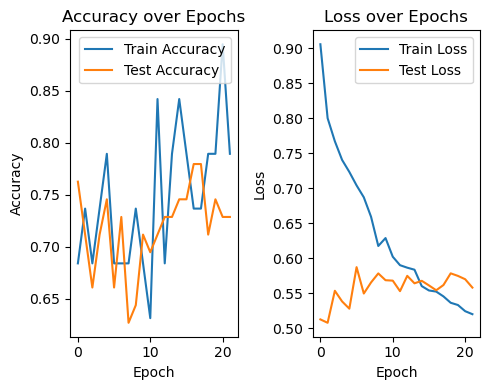

In [8]:
import matplotlib.pyplot as plt

# Convert losses to numpy-compatible lists directly
train_losses_cpu = [float(loss) for loss in train_losses]
test_losses_cpu = [float(loss) for loss in test_losses]

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

##  Attacking the GRUD model
Modify ```audit.yaml ``` file to attack GRUD model: 
  
  ```
  module_path: "utils/model_grud.py" 
  model_class: "GRUD"
  target_folder: "./target_GRUD"
  data_path: "./data/unflattened/dataset.pkl"
  ```

In [9]:
from mimic_gru_handler import MimicInputHandlerGRU

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandlerGRU, config_path)

# Run the audit
mia_results = leakpro.run_audit(return_results=True)

2025-01-04 09:41:35,162 INFO     Target model blueprint created from GRUD in utils/model_grud.py.
2025-01-04 09:41:35,170 INFO     Loaded target model metadata from ./target_GRUD/model_metadata.pkl
2025-01-04 09:41:35,174 INFO     Loaded target model from ./target_GRUD


2025-01-04 09:41:36,126 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2025-01-04 09:41:36,127 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2025-01-04 09:41:36,128 INFO     Creating shadow model handler singleton
2025-01-04 09:41:36,132 INFO     Creating distillation model handler singleton
2025-01-04 09:41:36,138 INFO     Configuring RMIA attack
2025-01-04 09:41:36,138 INFO     Added attack: rmia
2025-01-04 09:41:36,138 INFO     Added attack: lira
2025-01-04 09:41:36,139 INFO     Preparing attack: rmia
2025-01-04 09:41:36,139 INFO     Preparing shadow models for RMIA attack
2025-01-04 09:41:36,139 INFO     Preparing attack data for training the RMIA attack
2025-01-04 09:41:36,141 INFO     Check for 8 shadow models (dataset: 23944 points)
2025-01-04 09:41:36,143 INFO     Number of existing models exceeds or equals the number of models to create
2025-01-04 09:41:36,144 INFO     Loading shadow model 0
2025-01-04 09:41:36,150 INFO     Load

## Report Genrating

In [10]:

# Import and initialize ReportHandler
from leakpro.reporting.report_handler import ReportHandler

# report_handler = ReportHandler()
report_handler = ReportHandler(report_dir="./leakpro_output/results")

# Save MIA resuls using report handler
for res in mia_results:
    report_handler.save_results(attack_name=res.attack_name, result_data=res, config=res.configs)

2025-01-04 09:45:16,653 INFO     Initializing report handler...
2025-01-04 09:45:16,654 INFO     report_dir set to: ./leakpro_output/results
2025-01-04 09:45:16,654 INFO     Saving results for rmia


2025-01-04 09:45:20,466 INFO     Saving results for lira


<Figure size 640x480 with 0 Axes>

In [11]:

# # Create the report by compiling the latex text
report_handler.create_report()

2025-01-04 09:45:33,289 INFO     No results of type GIAResults found.
2025-01-04 09:45:33,289 INFO     No results of type SinglingOutResults found.
2025-01-04 09:45:33,290 INFO     No results of type InferenceResults found.
2025-01-04 09:45:33,290 INFO     No results of type LinkabilityResults found.
2025-01-04 09:45:40,303 INFO     PDF compiled


<Figure size 640x480 with 0 Axes>